<img src="../../../images/banners/ml-algorithms.jpg" width="600"/>

<a class="anchor" id="intro_to_data_structures"></a>
# <img src="../../../images/logos/ml-logo.png" width="23"/> Machine Learning Algorithms

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents
* [Linear Regression](#)
* [What is Maximum Likelihood?](#)

---

We turn now to a discussion of supervised learning, starting with regression. The goal of regression is to predict the value of one or more continuous target variables $t$ given the value of a D-dimensional vector $x$ of input variables.

Given a training data set comprising $N$ observations ${x_n}$, where $n = 1, ... , N$,
together with corresponding target values ${t_n}$, the goal is to predict the value of $t$ for a new value of $x$. In the simplest approach, this can be done by directly constructing an appropriate function $y(x)$ whose values for new inputs $x$ constitute the predictions for the corresponding values of $t$.

More generally, from a probabilistic perspective, we aim to model the predictive distribution $p(t|x)$ because this expresses our uncertainty about the value of $t$ for each value of $x$. From this conditional distribution we can make predictions of $t$, for any new value of $x$, in such a way as to minimize the expected value of a suitably chosen loss function. A common choice of loss function for real-valued variables is the squared loss, for which the optimal solution is given by the conditional expectation of $t$.

Although linear models have significant limitations as practical techniques for
pattern recognition, particularly for problems involving input spaces of high dimensionality, they have nice analytical properties and form the foundation for more sophisticated models to be discussed in later sections.

<img src="../images/linear-nonlinear.png" width="500"/>

## Linear Regression

The simplest linear model for regression is one that involves a linear combination of the input variables:

\begin{equation}
y(x,w) = w_0 + w_1x_1 + \cdots + w_Dx_D
\end{equation}

where $x = (x_1, \cdots , x_D)^T$. This is often simply known as linear regression. The key property of this model is that it is a linear function of the parameters $w_0, \cdots , w_D$. It is also, however, a linear function of the input variables $x_i$, and this imposes significant limitations on the model. We therefore extend the class of models by considering linear combinations of fixed nonlinear functions of the input variables, of the form:

\begin{equation}
y(x,w) = w_0 + \frac{1}{M} \sum_{j=1}^{M} w_j X_j(x)
\end{equation}

By denoting the maximum value of the index j by M − 1, the total number of parameters in this model will be M.

The parameter $w_0$ allows for any fixed offset in the data and is sometimes called a bias parameter (not to be confused with ‘bias’ in a statistical sense).

It is often convenient to define an additional dummy feature $X_0 = 1$ so that

\begin{equation}
y(x,w) = \sum_{j=0}^{M-1} w_j X_j = w^T X(x)
\end{equation}

where $w = (w_0, \cdots, w_{M-1})^T$ and $X = (X_0, \cdots, X_{M-1})^T$.

<img src="../images/linear-model-formula.webp" width="200"/>

## What is Maximum Likelihood?

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

Note that maximum likelihood is not probability. Probability corresponds to finding the chance of something given a sample distribution of the data, while on the other hand, Likelihood refers to finding the best distribution of the data given a particular value of some feature or some situation in the data. While probability is used to find the chance of occurrence of a particular situation, likelihood is used to generally maximizing the chances of a particular situation to occur. To learn more, watch:

- <img src="../../../images/logos/youtube.png" width="15"/> [Probability is not Likelihood](https://www.youtube.com/watch?v=pYxNSUDSFH4&t=1s)

## Maximum Likelihood Formulation

This section is covered by:
- <img src="../../../images/logos/book.png" width="16"/> [Chapter 5 of Machine Learning Handbook by Martha White](https://marthawhite.github.io/mlcourse/notes.pdf)

Read:
- 5 Linear Regression
- 5.1 Maximum likelihood formulation
- 5.2 Ordinary Least-Squares (OLS) Regression
- 5.3 Linear regression for non-linear problems

Also read:
- [Independent and identically distributed random variables (i.i.d)](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)
- [Vector Norms](https://builtin.com/data-science/vector-norms) which are a way to measure the size of a vector, a matrix, or a tensor. In other words, norms are a class of functions that enable us to quantify the magnitude of a vector.

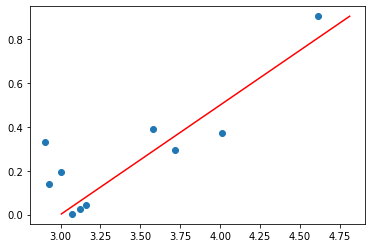

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(sorted(np.random.rand(10)))
y = 2 * x + 3
plt.plot(y, x, color='red')
plt.scatter(y + np.random.randn(10) / 3, x)

<img src="../images/convex-non-convex.png" width="400"/>

In [44]:
import seaborn as sns

In [45]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Example 01

In [1]:
import numpy as np
from numpy.linalg import inv

In [2]:
X = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
    ]
)

y = np.array([1.2, 2.3, 2.3, 3.3])

In [3]:
w_mle = inv(X.T @ X) @ X.T @ y

In [4]:
w_mle

array([0.7 , 0.63])

### Example 02: $w$ vs. $w_{mle}$

In [5]:
e = [-0.3, 0.3, -0.2, 0.3]

In [6]:
w = np.array([1, 0.5])
y = X @ w + e

In [7]:
w, w_mle

(array([1. , 0.5]), array([0.7 , 0.63]))

In [8]:
y

array([1.2, 2.3, 2.3, 3.3])

### Example 03: Polynomial Curve Fitting

#### $p = 2$ (Train)

In [17]:
PHI2 = np.array([
    [1, 1, 1],
    [1, 2, 4],
    [1, 3, 9],
    [1, 4, 16],
])

In [18]:
w_mle = inv(PHI2.T @ PHI2) @ PHI2.T @ y

In [19]:
w_mle

array([ 0.575,  0.755, -0.025])

In [20]:
e_train = np.sum((y - PHI2 @ w_mle) ** 2)

In [21]:
e_train

0.2205000000000002

#### $p=3$

In [22]:
PHI3 = np.array([
    [1, 1, 1, 1],
    [1, 2, 4, 8],
    [1, 3, 9, 27],
    [1, 4, 16, 64],
])

In [23]:
w_mle = inv(PHI3.T @ PHI3) @ PHI3.T @ y

In [24]:
w_mle

array([-3.1 ,  6.6 , -2.65,  0.35])

In [25]:
e = np.sum((y - PHI3 @ w_mle) ** 2)
e

1.3286854124644085e-22

In [26]:
# overfitting
np.isclose(e, 0)

True

### Example 04: $p=3$ with Regularization ($\lambda = 1$)

In [28]:
PHI3 = np.array([
    [1, 1, 1, 1],
    [1, 2, 4, 8],
    [1, 3, 9, 27],
    [1, 4, 16, 64],
])

In [29]:
l = 1

In [30]:
w_mle = inv(PHI3.T @ PHI3 + l * np.eye(4)) @ PHI3.T @ y

In [31]:
w_mle

array([ 0.39185822,  0.40195489,  0.24646617, -0.04272825])

In [32]:
e = np.sum((y - PHI3 @ w_mle) ** 2)
e

0.3923596899260681

## Bias Variance Tradeoff

<img src="../images/bias-variance.png" width="400"/>

<img src="../images/bias-variance-2.jpeg" width="400"/>

<img src="../images/bias-variance-3.png" width="500"/>

<img src="../images/bias-variance-4.jpeg" width="500"/>

## Gradient Descent

### Line Search

In this example, we first define the cost function and the gradient function for linear regression. We then define the line search function, which performs the backtracking line search to find the optimal step size for gradient descent. Finally, we define the gradient descent function, which uses the line search function to perform gradient descent to find the optimal parameters for the linear regression model.

To use this program, you would need to provide your own data in the form of an input matrix X and a target vector y, as well as the hyperparameters `alpha`, `beta` and `num_iters` for gradient descent. The program will return the learned parameters theta for the linear regression model.

In [3]:
import numpy as np

In [4]:
# Define the cost function
def cost_function(X, y, w):
    n, d = X.shape
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / (2 * n)

In [5]:
# Define the gradient function
def gradient(X, y, w):
    n, d = X.shape
    grad = X.T @ ((X @ w) - y) / n
    return grad

In [6]:
# Define the line search function
def line_search(X, y, w, alpha=0.001, beta=0.7):
    cost = cost_function(X, y, theta)
    grad = gradient(X, y, w)
    step_size = 1.0

    while cost_function(X, y, w - step_size * grad) > cost + alpha:
        step_size = beta * step_size

    return step_size

In [15]:
# Define the gradient descent function
def gradient_descent(X, y, alpha=0.001, beta=0.7, num_iters=100):
    n, d = X.shape
    w = np.zeros((d, 1))

    costs = []
    for i in range(num_iters):
        step_size = line_search(X, y, w, alpha, beta)
        w = w - step_size * gradient(X, y, w)
        costs.append(cost_function(X, y, w))
        
    return w, costs

In [16]:
np.random.seed(0)
X = np.random.rand(100, 3)
y = np.dot(X, np.array([1, 2, 3]).reshape(-1, 1)) + np.random.randn(100, 1)

In [17]:
# Add a column of ones to X for the intercept term
X = np.hstack((np.ones((len(y), 1)), X))

In [18]:
# Run gradient descent
w, costs = gradient_descent(X, y, num_iters=100)

In [19]:
# Print the learned parameters
print("Learned parameters:", w)

Learned parameters: [[-0.03451954]
 [ 0.58707451]
 [ 1.96851238]
 [ 3.24011127]]


In [20]:
w_mle = np.linalg.inv(X.T @ X) @ X.T @ y
print("Closed form parameters:", w_mle)

Closed form parameters: [[-0.0497861 ]
 [ 0.59132477]
 [ 1.97995663]
 [ 3.25323099]]


#### Cost Function Plot

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

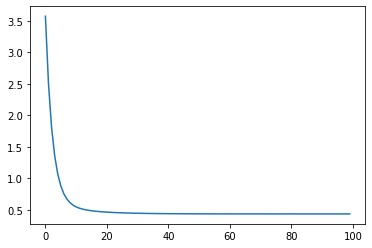

In [22]:
plt.plot(
    range(len(costs)),
    costs
)

## Batch Gradient Descent

In [23]:
import numpy as np

In [24]:
# Define the cost function for linear regression
def cost_function(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    J = np.sum((h - y) ** 2) / (2 * m)
    return J

In [25]:
# Define the gradient function for linear regression
def gradient(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    grad = np.dot(X.T, (h - y)) / m
    return grad

In [26]:
# Define the line search function
def line_search(X, y, theta, d, alpha=0.01, beta=0.5):
    t = 1.0
    while cost_function(X, y, theta + t*d) > cost_function(X, y, theta) + alpha*t*np.dot(d.T, gradient(X, y, theta)):
        t = beta*t
    return t

In [27]:
# Define the batch gradient descent function with line search
def batch_gradient_descent(X, y, batch_size, alpha=0.01, num_iters=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for i in range(num_iters):
        # randomly shuffle the indices of the training data
        indices = np.random.permutation(m)
        # split the indices into batches of size batch_size
        for j in range(0, m, batch_size):
            batch_indices = indices[j:j+batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            # compute the gradient of the cost function for the batch
            grad = gradient(X_batch, y_batch, theta)
            # compute the search direction for the batch
            d = -grad
            # perform line search to find the optimal step size for the batch
            t = line_search(X_batch, y_batch, theta, d)
            # update the parameters using the optimal step size and search direction
            theta = theta + t*d
    return theta

In [28]:
# Generate some sample data
np.random.seed(0)
X = np.random.rand(1000, 3)
y = np.dot(X, np.array([1, 2, 3]).reshape(-1, 1)) + np.random.randn(1000, 1)

In [29]:
# Add a column of ones to X for the intercept term
X = np.hstack((np.ones((len(y), 1)), X))

In [30]:
# Run batch gradient descent
theta = batch_gradient_descent(X, y, batch_size=50, alpha=0.01, num_iters=1000)

In [31]:
# Print the learned parameters
print("Learned parameters:", theta)

Learned parameters: [[0.69113006]
 [1.08373314]
 [1.97832541]
 [3.20359376]]
